In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
merged= pd.read_csv("disaster_global_temp.csv")
merged.head()

,year,start_month,seq,subgroup,type,subsubtype,temperature,iso,alpha-2,country,continent,sub_region
0,1970-01-01,1.0,13,Hydrological,Flood,NaN,0.442,ARG,AR,Argentina,Americas,Latin America and the Caribbean
1,1970-01-01,1.0,109,Meteorological,Storm,NaN,0.008,AUS,AU,Australia,Oceania,Australia and New Zealand
2,1970-01-01,9.0,44,Hydrological,Flood,NaN,0.343,BEN,BJ,Benin,Africa,Sub-Saharan Africa
3,1970-01-01,11.0,63,Meteorological,Storm,NaN,-0.031,BGD,BD,Bangladesh,Asia,Southern Asia
4,1970-01-01,4.0,26,Meteorological,Storm,NaN,-0.031,BGD,BD,Bangladesh,Asia,Southern Asia


In [3]:
# Group the number of distinct disaster types by year

types_by_year= merged.groupby(["year","type"])["type"].size()
types_by_year

year        type                 
1970-01-01  Drought                   2
            Earthquake               12
            Epidemic                  4
            Flood                    31
            Landslide                 6
                                     ..
2021-01-01  Glacial lake outburst     2
            Landslide                10
            Storm                    83
            Volcanic activity         8
            Wildfire                 16
Name: type, Length: 508, dtype: int64

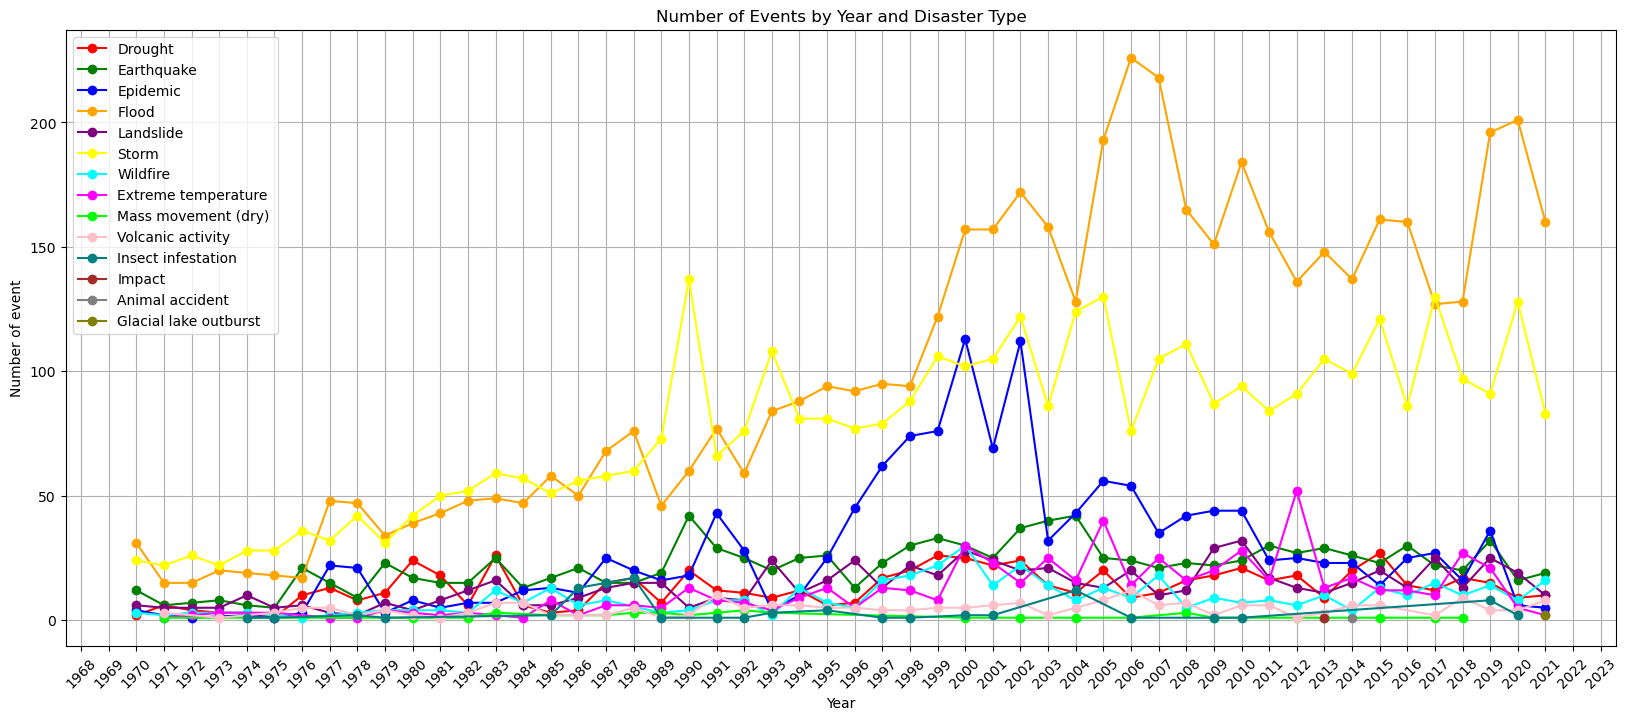

In [4]:
# Visualize the grouped data

df_types_by_year= types_by_year.reset_index(name='nb_event')

# Convert "year" column to datetime format
df_types_by_year['year'] = pd.to_datetime(df_types_by_year['year'])  
disaster_types = df_types_by_year["type"].unique()

# Create a separate line plot for each disaster type
plt.figure(figsize=(20, 8))

colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'brown', 'gray', 'olive', 'navy']
for i, disaster_type in enumerate(disaster_types):
    subset = df_types_by_year[df_types_by_year["type"] == disaster_type]
    plt.plot(subset["year"], subset["nb_event"], marker='o', color=colors[i], label=disaster_type)

plt.xlabel('Year')
plt.ylabel('Number of event')
plt.title('Number of Events by Year and Disaster Type')
plt.xticks(rotation=45)

# Set the x-axis tick locator and formatter
years_locator = mdates.YearLocator()
years_formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years_locator)
plt.gca().xaxis.set_major_formatter(years_formatter)

plt.legend()
plt.grid(True)
plt.show()

In [5]:
# To reduce clutter on the x-axis, consider displaying data for every fifth year

df_types_by_year_5th_year= df_types_by_year[df_types_by_year["year"].dt.year %5 ==0 ]

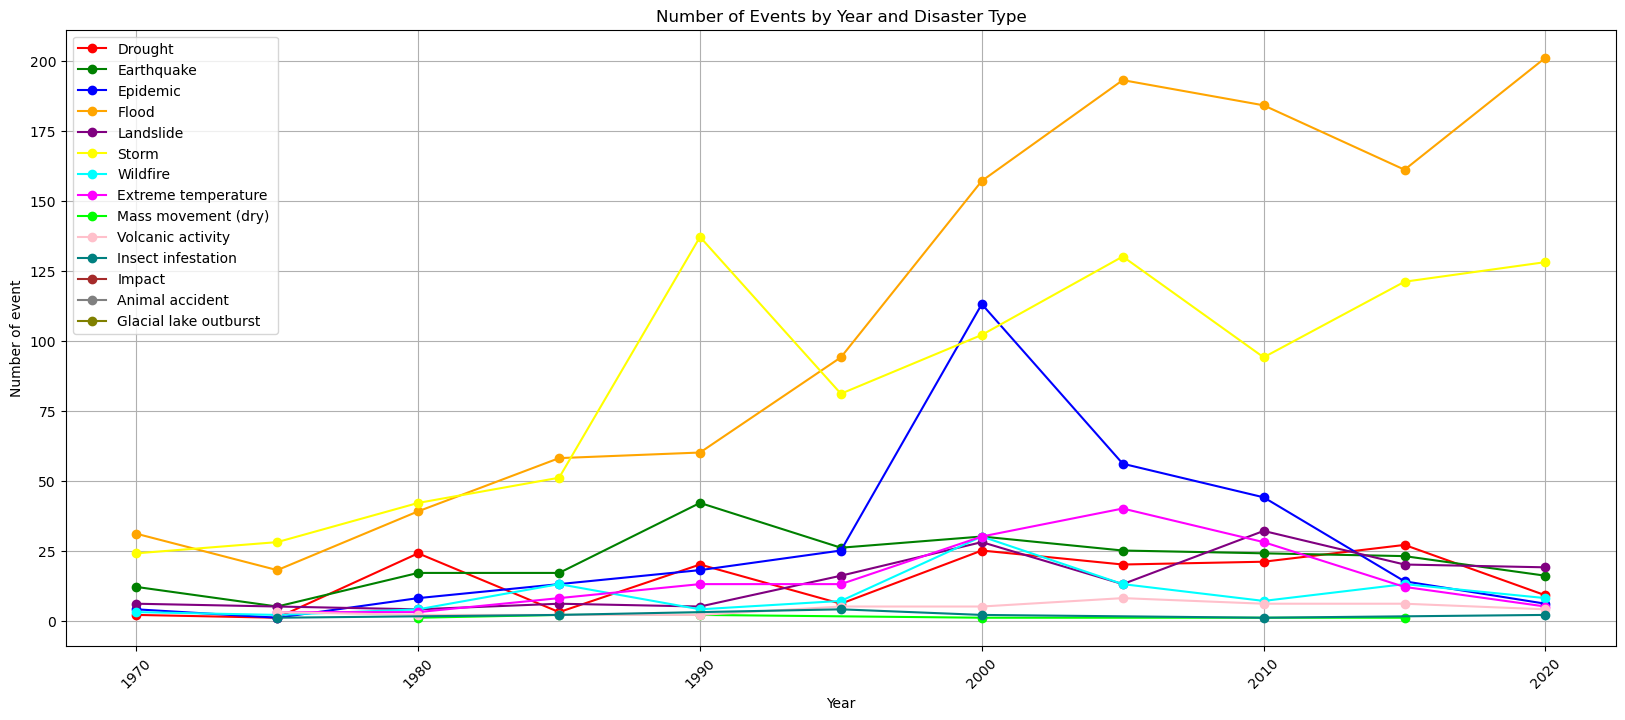

In [6]:
# Visualize the filtered data once again after applying the desired year filte

plt.figure(figsize=(20, 8))

disaster_types_5th_year = df_types_by_year_5th_year["type"].unique()

colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'brown', 'gray', 'olive', 'navy']
for i, disaster_type in enumerate(disaster_types):
    subset = df_types_by_year_5th_year[df_types_by_year_5th_year["type"] == disaster_type]
    plt.plot(subset["year"], subset["nb_event"], marker='o', color=colors[i], label=disaster_type)

plt.xlabel('Year')
plt.ylabel('Number of event')
plt.title('Number of Events by Year and Disaster Type')
plt.xticks(rotation=45)


plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Upon visualizing the data and noticing an upward trend in the occurrence of storms and floods over time,
# apply a filter to focus exclusively on these two types of disasters in the grouped data

df_storm_flood = df_types_by_year[df_types_by_year["type"].isin(["Storm", "Flood"])]
df_storm_flood.head()

,year,type,nb_event
3,1970-01-01,Flood,31
5,1970-01-01,Storm,24
11,1971-01-01,Flood,15
14,1971-01-01,Storm,22
21,1972-01-01,Flood,15


<Axes: xlabel='year', ylabel='nb_event'>

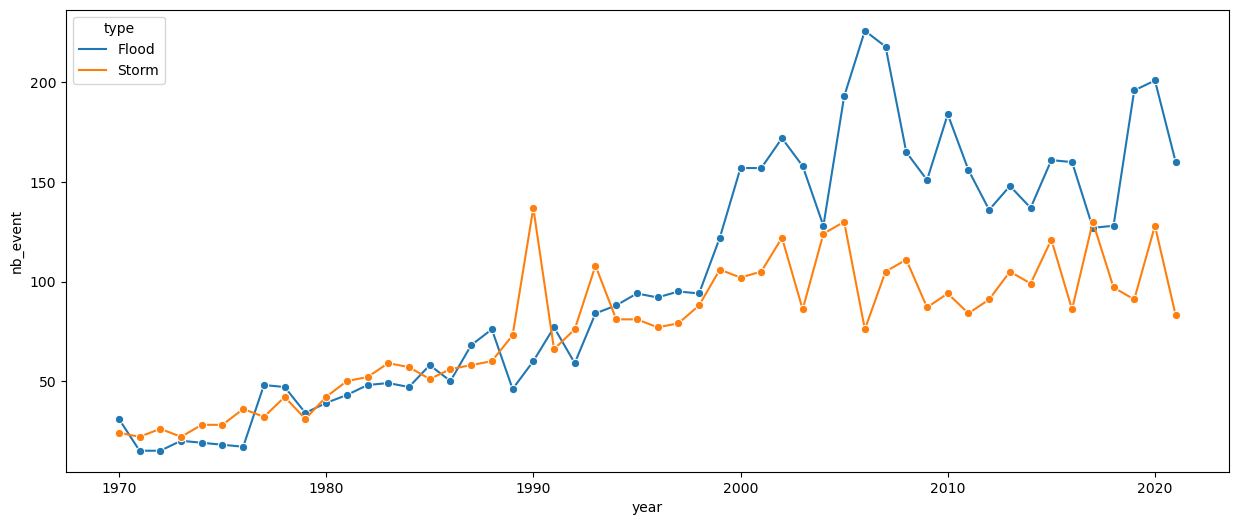

In [8]:
# Visualize the filtered data specifically for storms and floods after applying the necessary filter

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_storm_flood, x="year", y="nb_event",hue="type",marker='o')

In [9]:
# Grouping the average temperature over the years

temp_mean_years= merged.groupby("year")["temperature"].mean().reset_index()
temp_mean_years.head()

,year,temperature
0,1970-01-01,0.053795
1,1971-01-01,-0.269452
2,1972-01-01,-0.143678
3,1973-01-01,0.194968
4,1974-01-01,-0.199441


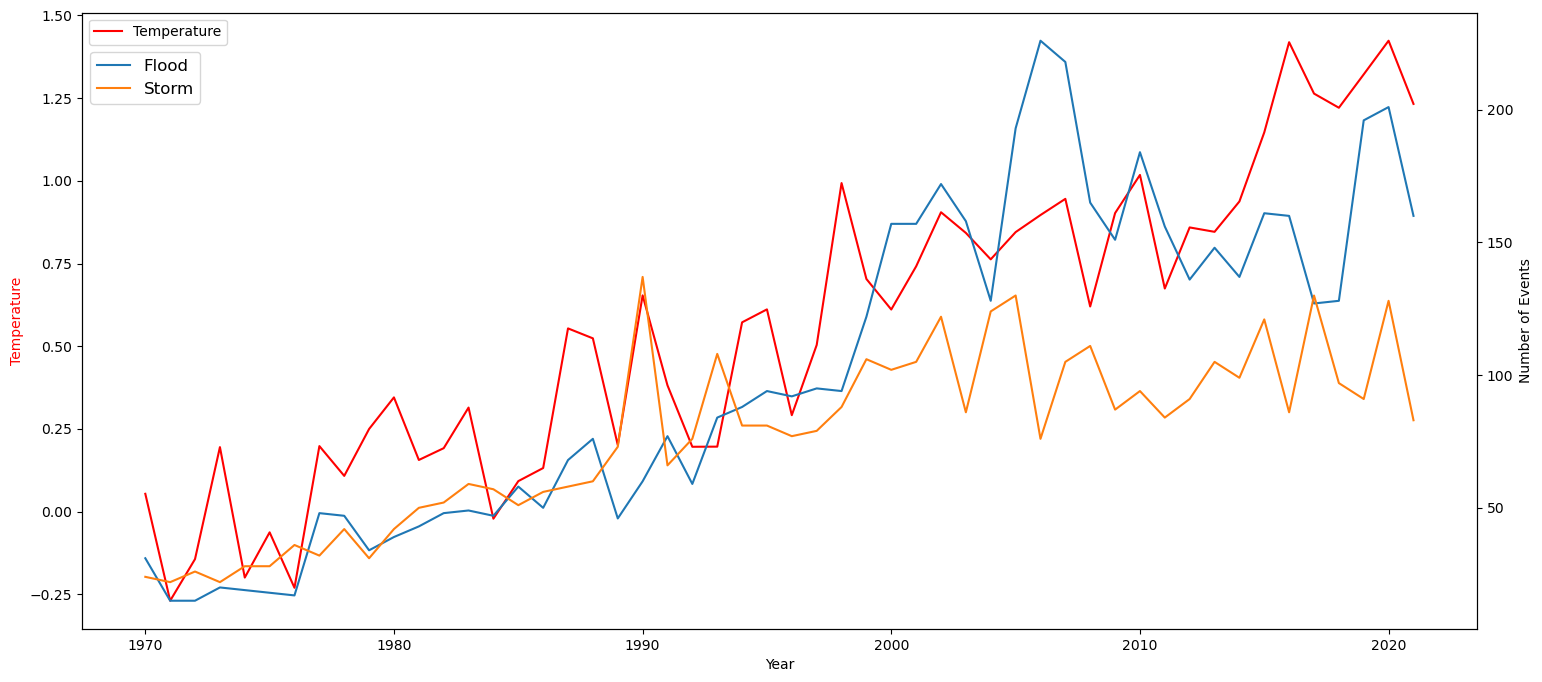

In [10]:
# Visualize the grouped data to observe the changes in the number of storms and floods, as well as the average
# temperature, over the years.

temp_mean_years["year"] = pd.to_datetime(temp_mean_years["year"])


fig, ax1 = plt.subplots(figsize=(18, 8))


# Plot the temperature data on the first y-axis
sns.lineplot(data=temp_mean_years, x="year", y="temperature", ax=ax1,color="red", label= "Temperature")
ax1.set_ylabel("Temperature", color="red")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the storm and flood data on the second y-axis
event_types = df_storm_flood["type"].unique()
for event_type in event_types:
    event_data = df_storm_flood[df_storm_flood["type"] == event_type]
    sns.lineplot(data=event_data, x="year", y="nb_event", ax=ax2,label=event_type )
ax2.set_ylabel("Number of Events")

ax1.set_xlabel("Year")

ax2.legend(
    #labels = ['Flood', "storm"],
    fontsize='large',loc="upper left",bbox_to_anchor=(0, 0.95))


plt.show()

In [11]:
# The next goal is to examine the correlation between global warming (temperature increase) and the increasing occurrences
# of storms and floods over time. Additionally, calculate the percentage change in the number of storms and floods
# between the first and last years of the dataset

df_storm_flood.head()

,year,type,nb_event
3,1970-01-01,Flood,31
5,1970-01-01,Storm,24
11,1971-01-01,Flood,15
14,1971-01-01,Storm,22
21,1972-01-01,Flood,15


In [12]:
# Find the first and last year of the dataset

first_year = df_storm_flood["year"].min()
last_year = df_storm_flood["year"].max()

In [13]:
print("first year:",first_year)
print("last year:",last_year)

first year: 1970-01-01 00:00:00
last year: 2021-01-01 00:00:00


In [14]:
# Filter the dataset(df_storm_flood) to retrieve the data for the first and last years

first_year_data = df_storm_flood[df_storm_flood["year"] == first_year]
last_year_data = df_storm_flood[df_storm_flood["year"] == last_year]

In [15]:
print("number of storms and floods in the first year:",first_year_data)
print("number of storms and floods in the last year:",last_year_data)

number of storms and floods in the first year:         year   type  nb_event
3 1970-01-01  Flood        31
5 1970-01-01  Storm        24
number of storms and floods in the last year:           year   type  nb_event
502 2021-01-01  Flood       160
505 2021-01-01  Storm        83


In [16]:
# Calculate the percentage change in the number of events, grouping them by disaster type, between the first and last years

first_year_events = first_year_data.groupby("type")["nb_event"].sum().reset_index()
last_year_events = last_year_data.groupby("type")["nb_event"].sum().reset_index()

percentage_change = (last_year_events["nb_event"] - first_year_events["nb_event"]) / first_year_events["nb_event"] * 100

df_percentage_change = pd.DataFrame({
    "type": first_year_events["type"],
    "percentage_change": percentage_change
})

In [17]:
df_percentage_change

,type,percentage_change
0,Flood,416.129032
1,Storm,245.833333


In [18]:
#  Merge the datasets

df_type_temp = pd.merge(df_storm_flood, temp_mean_years, on="year")
df_type_temp .head()

,year,type,nb_event,temperature
0,1970-01-01,Flood,31,0.053795
1,1970-01-01,Storm,24,0.053795
2,1971-01-01,Flood,15,-0.269452
3,1971-01-01,Storm,22,-0.269452
4,1972-01-01,Flood,15,-0.143678


In [19]:
# Define the disaster types of interest as "Flood" and "Storm"

disaster_type1 = "Flood"
disaster_type2 = "Storm"

# Create a subset dataframe, "df_subset", containing the columns "type", "temperature", and "nb_event"

df_subset = df_type_temp[["type", "temperature", "nb_event"]]

# separate dataframes, "df_flood" and "df_storm", which specifically hold the records pertaining to the 
# "Flood" and "Storm" disaster types

df_flood = df_type_temp[df_type_temp["type"] == disaster_type1]
df_storm = df_type_temp[df_type_temp["type"] == disaster_type2]

In [20]:
# Calculate the correlations between "temperature" and "nb_event" variables for the "Flood" and "Storm"

correlation_flood = df_flood[["temperature", "nb_event"]].corr()
correlation_storm = df_storm[["temperature", "nb_event"]].corr()

In [21]:
# Display the correlation matrix

print(f"Correlation for {disaster_type1}:\n{correlation_flood}")
print(f"Correlation for {disaster_type2}:\n{correlation_storm}")

Correlation for Flood:
             temperature  nb_event
temperature     1.000000  0.860494
nb_event        0.860494  1.000000
Correlation for Storm:
             temperature  nb_event
temperature     1.000000  0.771579
nb_event        0.771579  1.000000


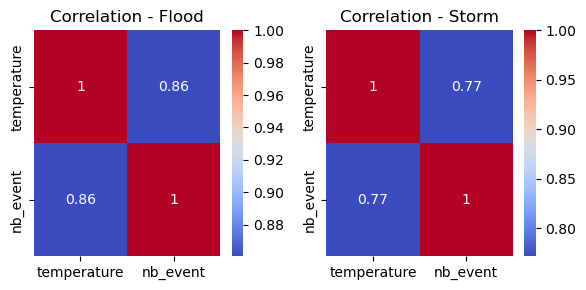

In [22]:
# Heatmap visualization

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

sns.heatmap(correlation_flood, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlation - Flood")

sns.heatmap(correlation_storm, annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation - Storm")

plt.tight_layout()
plt.show()